In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [34]:
Porto_Sobrev=train.filter(items=['Survived', 'Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

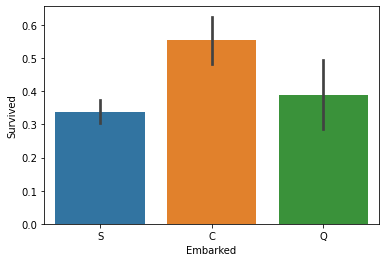

In [58]:
sns.barplot(x=train.Embarked, y=train.Survived, data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

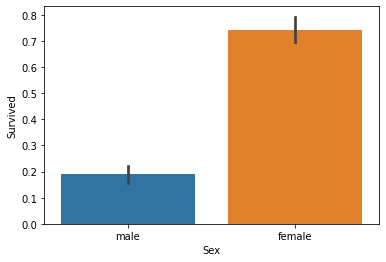

In [59]:
sns.barplot(x=train.Sex, y=train.Survived, data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

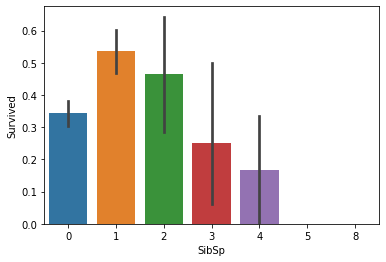

In [63]:
sns.barplot(x=train.SibSp, y=train.Survived, data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

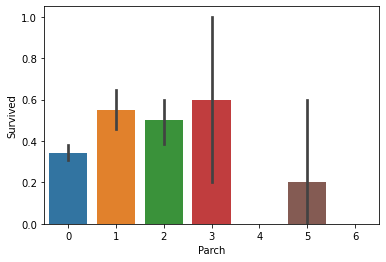

In [64]:
sns.barplot(x=train.Parch, y=train.Survived, data=train)

Text(0, 0.5, 'Sobreviveu')

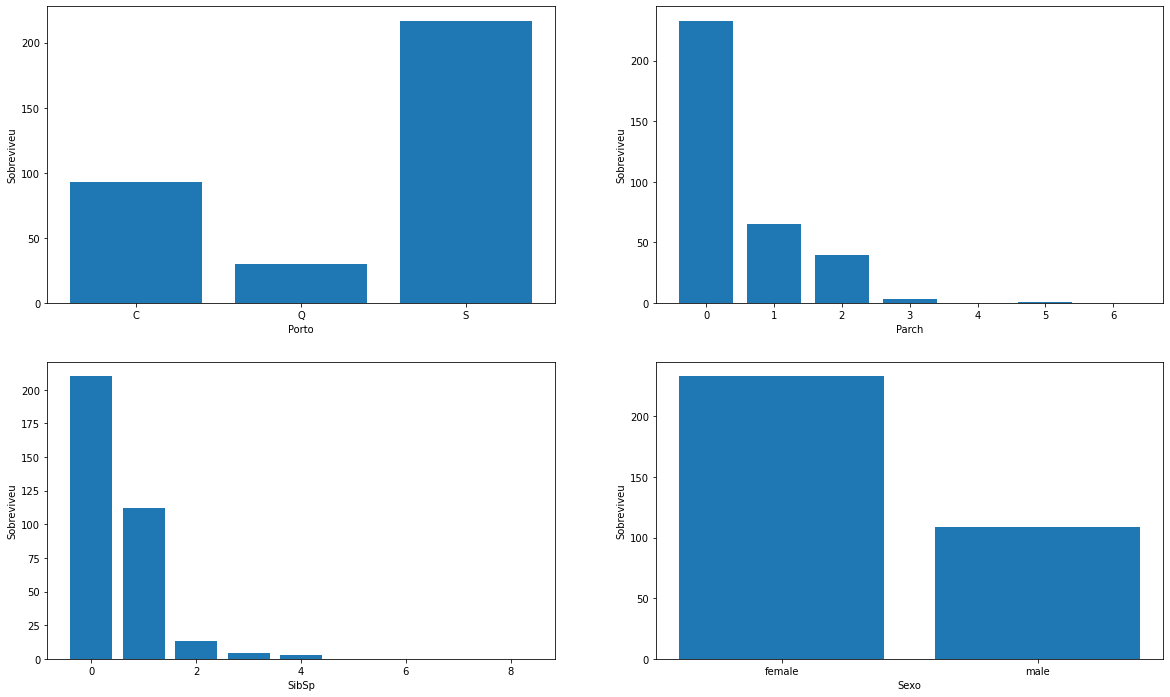

In [39]:
from matplotlib import gridspec
fig=plt.figure(figsize=(20,12))
specs=gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1=fig.add_subplot(specs[0,0])
ax2=fig.add_subplot(specs[0,1])
ax3=fig.add_subplot(specs[1,0])
ax4=fig.add_subplot(specs[1,1])

Porto_Sobrev=train[['Survived', 'Embarked']].groupby('Embarked').sum().reset_index()
#sns.barplot(x='Embarked', y='Survived', data=Porto_Sobrev);
ax1.bar(Porto_Sobrev['Embarked'], Porto_Sobrev['Survived'])
ax1.set_xlabel('Porto')
ax1.set_ylabel('Sobreviveu')

Porto_Sobrev=train[['Survived', 'Parch']].groupby('Parch').sum().reset_index()
#sns.barplot(x='Parch', y='Survived', data=Porto_Sobrev);
ax2.bar(Porto_Sobrev['Parch'], Porto_Sobrev['Survived'])
ax2.set_xlabel('Parch')
ax2.set_ylabel('Sobreviveu')

Porto_Sobrev=train[['Survived', 'SibSp']].groupby('SibSp').sum().reset_index()
#sns.barplot(x='SibSp', y='Survived', data=Porto_Sobrev);
ax3.bar(Porto_Sobrev['SibSp'], Porto_Sobrev['Survived'])
ax3.set_xlabel('SibSp')
ax3.set_ylabel('Sobreviveu')

Porto_Sobrev=train[['Survived', 'Sex']].groupby('Sex').sum().reset_index()
#sns.barplot(x='Sex', y='Survived', data=Porto_Sobrev);
ax4.bar(Porto_Sobrev['Sex'], Porto_Sobrev['Survived'])
ax4.set_xlabel('Sexo')
ax4.set_ylabel('Sobreviveu')


# Modelo

In [10]:
from sklearn.ensemble import RandomForestClassifier as rndf

In [11]:
def trans(valor):
    if valor =='female':
        return 1
    else:
        return 0

In [13]:
train['Sex_binario']=train['Sex'].map(trans)

In [16]:
def porto1 (valor):
    if valor =='C':
        return 1
    else:
        return 0
def porto2 (valor):
    if valor =='S':
        return 1
    else:
        return 0

In [17]:
train['Porto1']=train['Embarked'].map(porto1)
train['Porto2']=train['Embarked'].map(porto2)

In [20]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,Porto1,Porto2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [35]:
variaveis=['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Porto1', 'Porto2']

In [36]:
# x = variaveis utilizadas para o modelo
# y = variaveis a prever 
x=train[variaveis]
y=train['Survived']

In [37]:
x=x.fillna(-1)

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [38]:
resultados=[]
for rep in range(5): 
    kf=RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

    for l_treino, l_valid in kf.split(x):
        
        x_treino, x_valid =x.iloc[l_treino], x.iloc[l_valid]
        y_treino, y_valid = y.iloc[l_treino], y.iloc[l_valid]
        #print(x_treino.head())

        modelo=rndf(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)

        p=modelo.predict(x_valid)

        acc=np.mean(y_valid==p)
        resultados.append(acc)
        

print('------------------------------')
print('Média: ')
print(np.mean(resultados))
print('------------------------------')

------------------------------
Média: 
0.7962918829042174
------------------------------
